In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.

In [3]:
from wandb_utils import *

data = WandBData()

In [79]:
def log2_graph_labels(g, x=False, y=False):
    print(g.get_xticks())
    if x:
        g.set_xticklabels([f"$2^{{ {int(np.log2(x//100))} }}$" for x in g.get_xticks()])
    if y:
        g.set_yticklabels([f"$2^{{ {int(np.log2(y//100))} }}$" for y in g.get_yticks()])

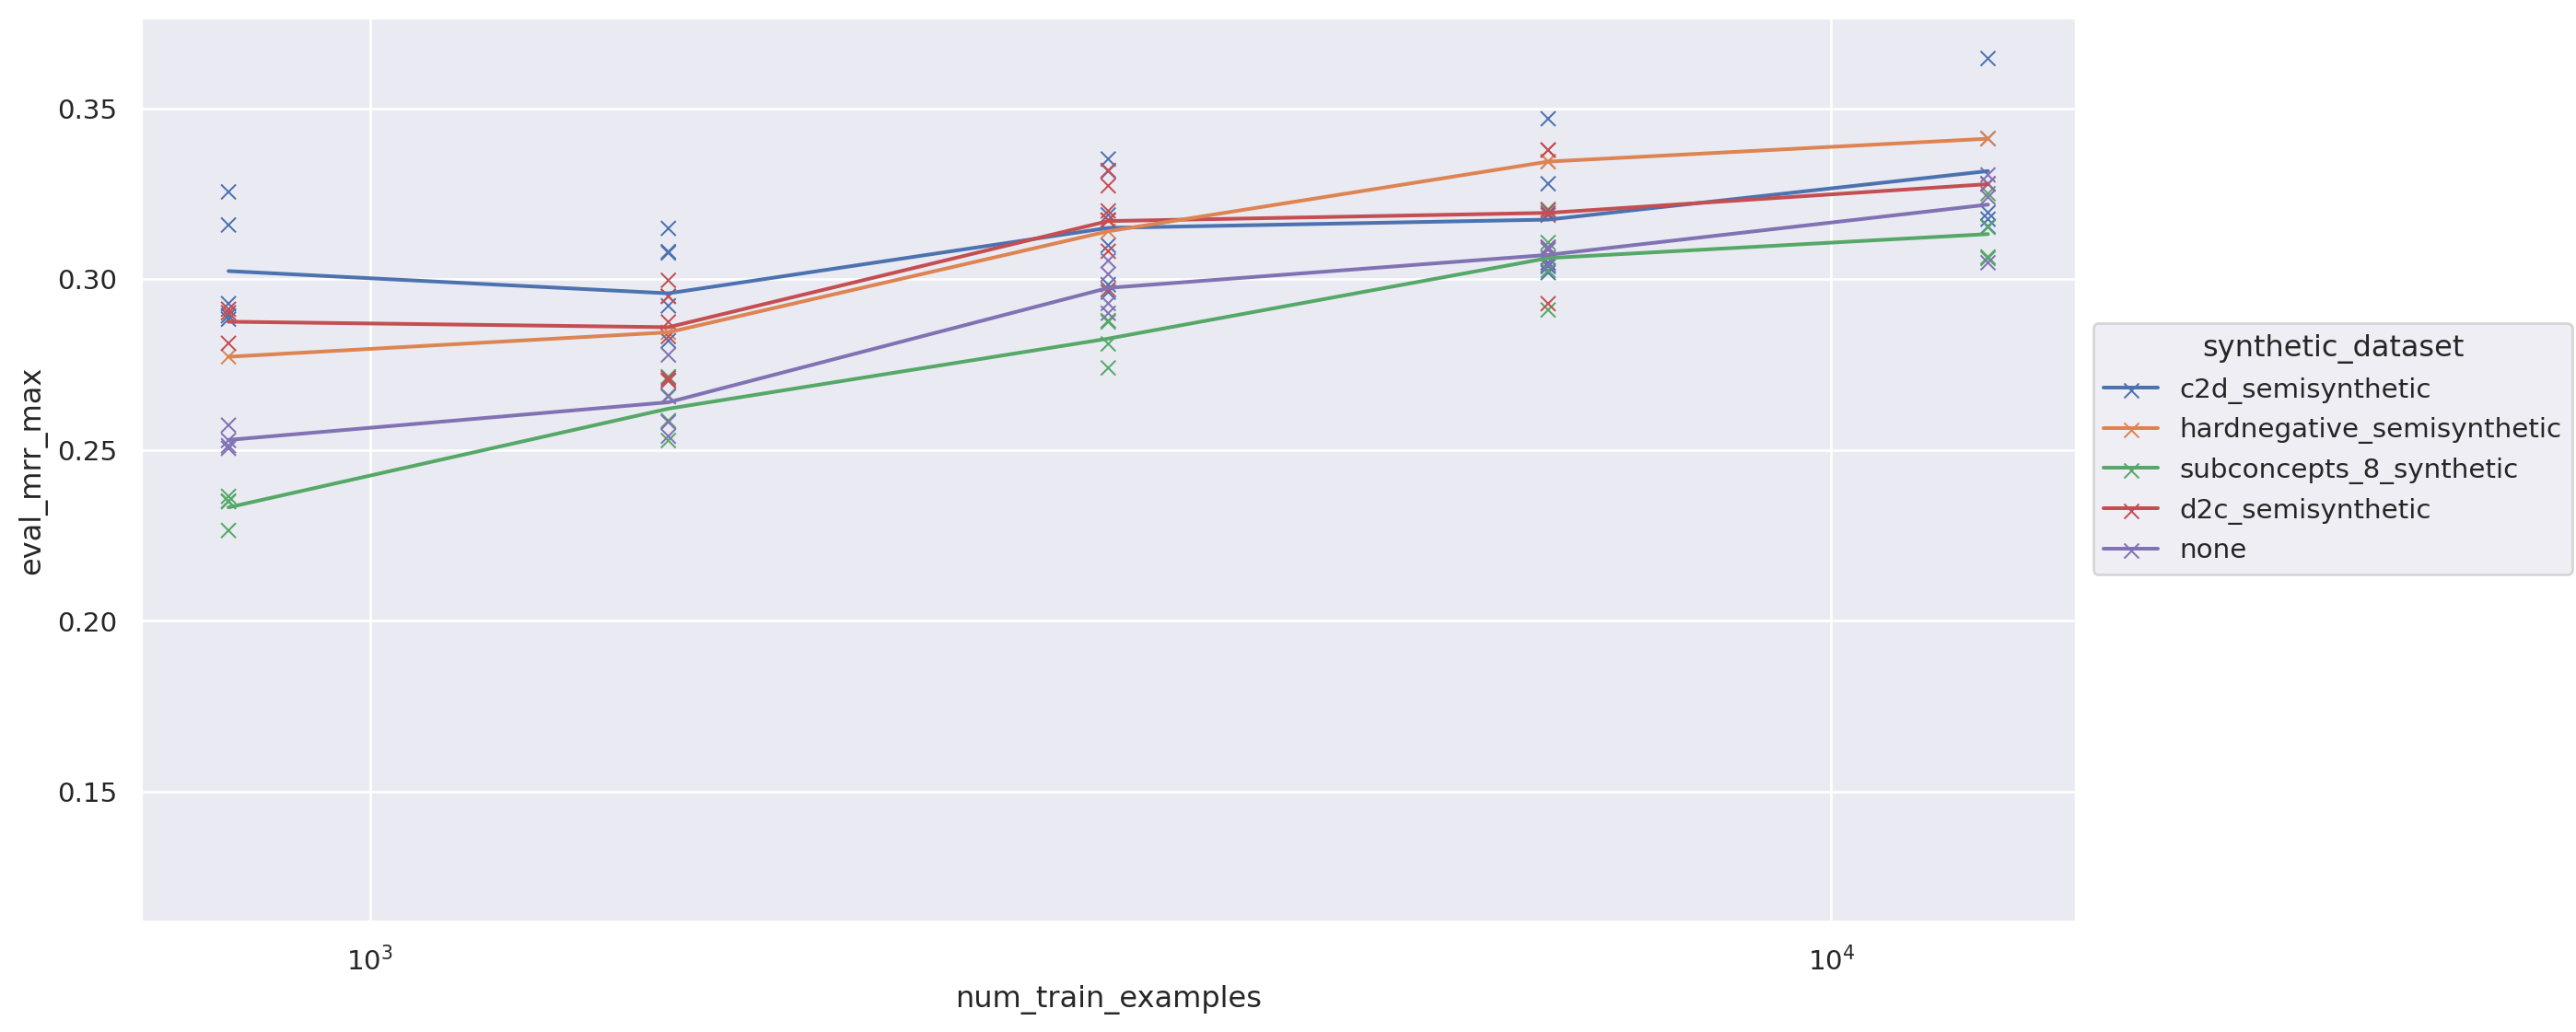

In [4]:
df = data.filtered_df(small=True, seeds=None)
df = df.fillna({"synthetic_dataset": "none"}, inplace=False)
(so.Plot(df, x="num_train_examples", y="eval_mrr_max", color="synthetic_dataset")
 .layout(size=(12, 6))
 .scale(x="log")
 .add(so.Dot(marker="x"))
 .add(so.Line(), so.Agg())
)

<Axes: xlabel='Number of synthetic examples (100s)', ylabel='Number of real examples (100s)'>

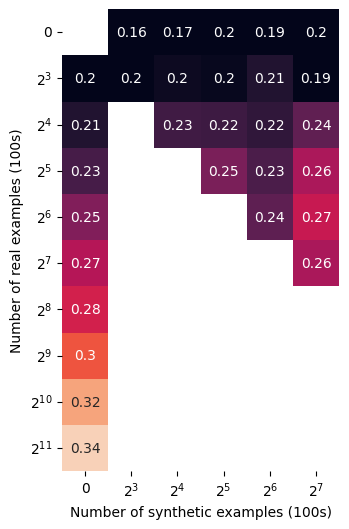

In [5]:
# Plot heatmap of num_synthetics_examples and num_train_examples
# for each dataset
# sns.set(style="whitegrid")

# data.refresh_data()
df = data.filtered_df(seeds=None, small=False, strategies=(np.nan, "paired", "paired-negative"), synthetic_datasets=None, overlap=False, new=True)
# df = df[(df['num_train_examples'] + df['num_synthetic_examples']).isin(2 ** np.arange(1,9) * 400)]
df = df[~(df['num_synthetic_examples']).isin((2400,4800,9600))]
# df = df[~(df['num_total_examples']).isin((108800,102400))]

def plot_heatmap(df, ax=None, values="test_mrr", aggfunc="first", cbar=False, vmin=0.2, vmax=0.35):
    df_pivot = df.pivot_table(index='num_train_examples', columns='num_synthetic_examples', values=values, aggfunc=aggfunc)

    g = sns.heatmap(df_pivot, annot=True, square=True, ax=ax, cbar=cbar, vmin=vmin, vmax=vmax)
    g.set(xlabel='Number of synthetic examples (100s)', ylabel='Number of real examples (100s)')

    g.set_xticks(g.get_xticks(), [f"$2^{{ {int(x+1.5)} }}$" if x > 0.5 else "0" for x in g.get_xticks()], rotation=0)
    g.set_yticks(g.get_yticks(), [f"$2^{{ {int(y+1.5)} }}$" if y > 0.5 else "0" for y in g.get_yticks()], rotation=0)
    return g

# fig, (ax1, ax2) = plt.subplots(1,2)

plt.figure(figsize = (14,6))
# plot_heatmap(df[df['synthetic_dataset'].isin([np.nan, 'd2c_semisynthetic'])])
# plot_heatmap(df[df['synthetic_dataset'].isin([np.nan, 'c2d_semisynthetic'])])
plot_heatmap(df[df['synthetic_dataset'].isin([np.nan, 'subconcepts_8_synthetic'])])
# plot_heatmap(df[df['synthetic_dataset'].isin([np.nan, 'hardnegative_semisynthetic'])])
# plot_heatmap(df[df['synthetic_dataset'].isin([np.nan, 'hardpositive_semisynthetic'])])

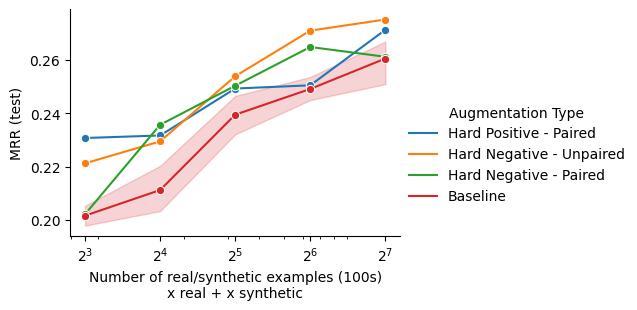

In [162]:
xtick_kwargs = dict(
    xticks=[800, 1600, 3200, 6400, 12800],
    xticklabels=[
        f"$2^{{ {int(np.log2(x//100))} }}$" for x in [800, 1600, 3200, 6400, 12800]
    ],
)
# data.refresh_data()
df = data.filtered_df(
    seeds=None,
    small=True,
    strategies=(np.nan, "paired", "paired-negative"),
    synthetic_datasets=(
        np.nan,
        "hardpositive_semisynthetic",
        "hardnegative_semisynthetic",
    ),
    overlap=False,
    new=False
)
# df = df.fillna({"synthetic_dataset": "Baseline"}, inplace=False)
# print(df[["synthetic_dataset_strategy","synthetic_dataset"]])
# df = df[~df["synthetic_dataset_strategy"].isna() | df["synthetic_dataset"].isna()]
df["Augmentation Type"] = df["synthetic_dataset"] + df[
    "synthetic_dataset_strategy"
].fillna("")

df["Augmentation Type"] = df["Augmentation Type"].apply(
    lambda x: {
        "hardpositive_semisyntheticpaired": "Hard Positive - Paired",
        "hardnegative_semisyntheticpaired-negative": "Hard Negative - Paired",
        "hardnegative_semisynthetic": "Hard Negative - Unpaired",
    }.get(x, "Baseline")
)
g = sns.relplot(
    data=df,
    x="num_train_examples",
    y="test_mrr",
    hue="Augmentation Type",
    kind="line",
    height=3,
    aspect=1.5,
    marker="o",
)
g.set(
    xlabel="Number of real/synthetic examples (100s)\nx real + x synthetic",
    ylabel="MRR (test)",
    xscale="log",
    **xtick_kwargs,
)

/tmp/ipykernel_130723/2625717061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Training Style"] = df["synthetic_dataset_strategy"].apply(


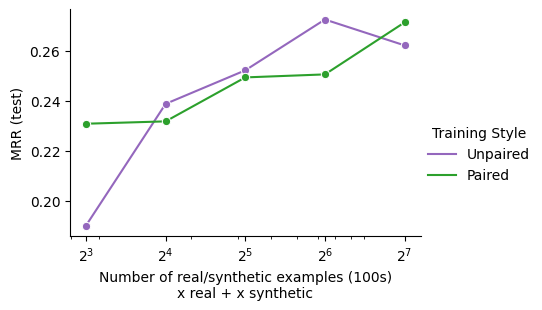

In [170]:
df = data.filtered_df(
    seeds=None,
    small=True,
    strategies=None,
    synthetic_datasets=("hardpositive_semisynthetic", "hardnegative_semisynthetic"),
    overlap=True,
    new=False,
)
df = df[df["synthetic_dataset"] == "hardpositive_semisynthetic"]

df["Training Style"] = df["synthetic_dataset_strategy"].apply(
    lambda x: {"paired": "Paired", "paired-negative": "Paired"}.get(x, "Unpaired")
)
g = sns.relplot(
    data=df,
    x="num_train_examples",
    y="test_mrr",
    # row="synthetic_dataset",
    hue="Training Style",
    kind="line",
    height=3,
    aspect=1.5,
    marker="o",
    palette={"Paired": "tab:green", "Unpaired": "tab:purple"},
)
g.set(
    xlabel="Number of real/synthetic examples (100s)\nx real + x synthetic",
    ylabel="MRR (test)",
    xscale="log",
    **xtick_kwargs
)

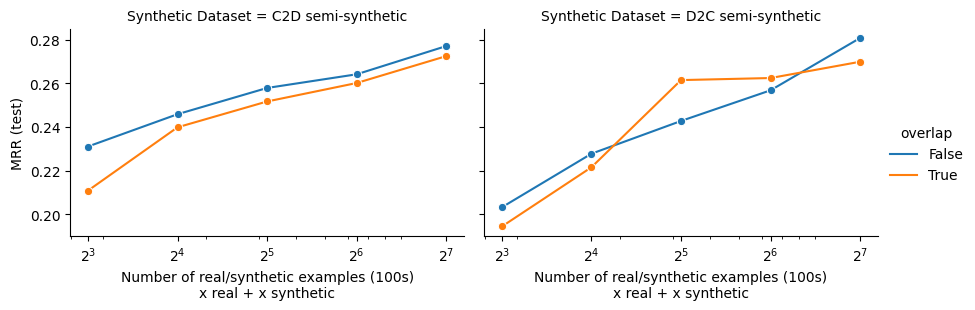

In [175]:
data.refresh_data()
df = data.filtered_df(seeds=None, small=True, strategies=None, synthetic_datasets=None, overlap=True, new=True)
df = df[df["num_train_examples"] == df["num_synthetic_examples"]]

df = df[df["synthetic_dataset"].str.contains("2")]
df["Synthetic Dataset"] = df["synthetic_dataset"].apply(lambda x: {"c2d_semisynthetic":"C2D semi-synthetic", "d2c_semisynthetic":"D2C semi-synthetic"}.get(x, "Baseline"))
g = sns.relplot(data=df, x="num_train_examples", y="test_mrr", col="Synthetic Dataset", hue="overlap", kind="line", height=3, aspect=1.5, marker="o")
g.set(xlabel='Number of real/synthetic examples (100s)\nx real + x synthetic', ylabel='MRR (test)', xscale="log", **xtick_kwargs)

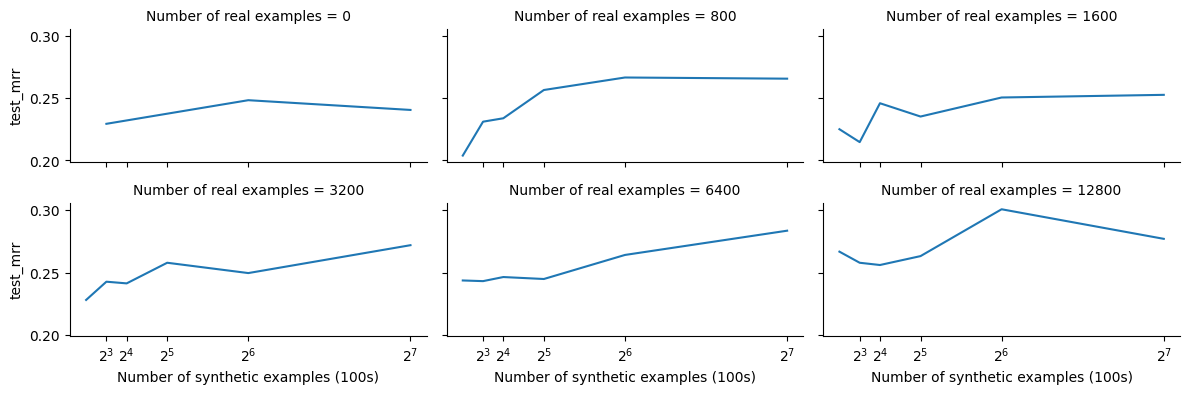

In [172]:
# df = d2c_df_0[d2c_df_0["num_train_examples"] <= 12800]
df = data.filtered_df(small=True, synthetic_datasets=(np.nan, "c2d_semisynthetic"), strategies=(np.nan,))
df = df.rename(columns={"num_synthetic_examples": "Number of synthetic examples (100s)", "num_train_examples": "Number of real examples"})
g = sns.relplot(data=df, col="Number of real examples", col_wrap=3, x="Number of synthetic examples (100s)", y="test_mrr", kind="line", height=2, aspect=2)
# g.set(xscale="log", ylim=(0.2, 0.35))
g.set(xticks=[800, 1600, 3200, 6400, 12800], xticklabels=[f"$2^{{ {int(np.log2(x//100))} }}$" for x in [800, 1600, 3200, 6400, 12800]])

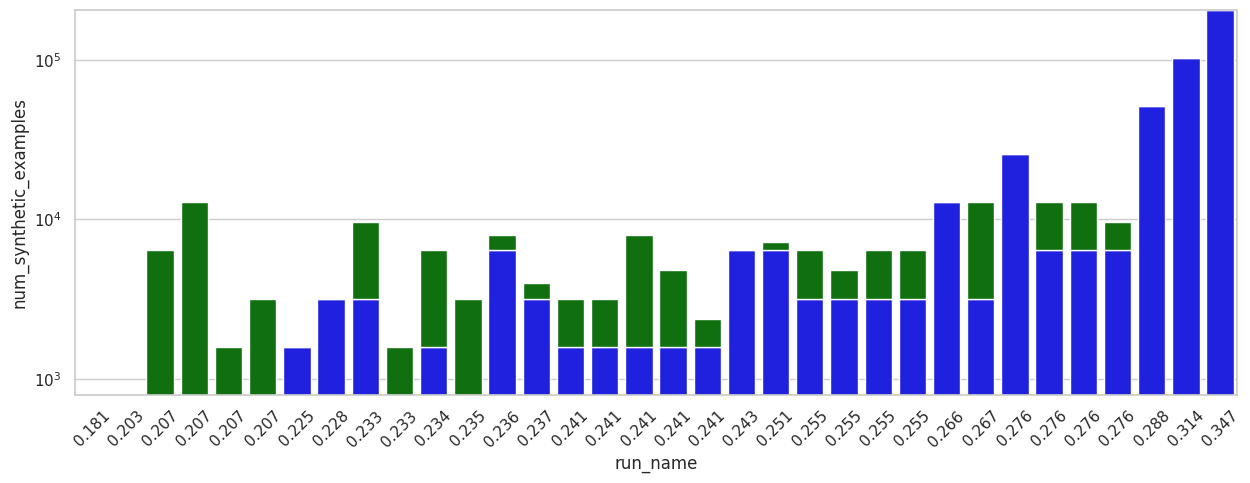

In [9]:
df = d2c_df_0.copy()
df["TestMRR"] = df["test_mrr"].astype(str).str[:5]
df = df.sort_values(by="test_mrr")
# Plotting the first part (Value1)
# fig, ax = plt.subplots()

# # First fill area for 'y1_values'
# ax.fill_between(df['test_mrr'], 0, df['num_train_examples'], color='blue', label='Real Examples')

# # Then fill area for 'y2_values' on top of 'y1_values'
# ax.fill_between(df['test_mrr'], df['num_train_examples'], df['num_total_examples'], color='green', label='Semi-Synthetic Examples')

# ax.set_xlabel("Test MRR")
# ax.set_ylabel("Total Training Examples")
# ax.legend()

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

# Plotting the first part (Value1)
sns.barplot(x='run_name', y='num_train_examples', data=df, color='blue', ax=ax)

# Plotting the second part (Value2) on top of the first
sns.barplot(x='run_name', y='num_synthetic_examples', data=df, color='green', bottom=df['num_train_examples'], ax=ax)

# ax.set_xticks(df['x_values'])  # Set x-ticks positions
ax.set_xticklabels(df['TestMRR'], rotation=45)  # Rotate x-tick labels by 45 degrees
ax.set_yscale('log')

plt.show()


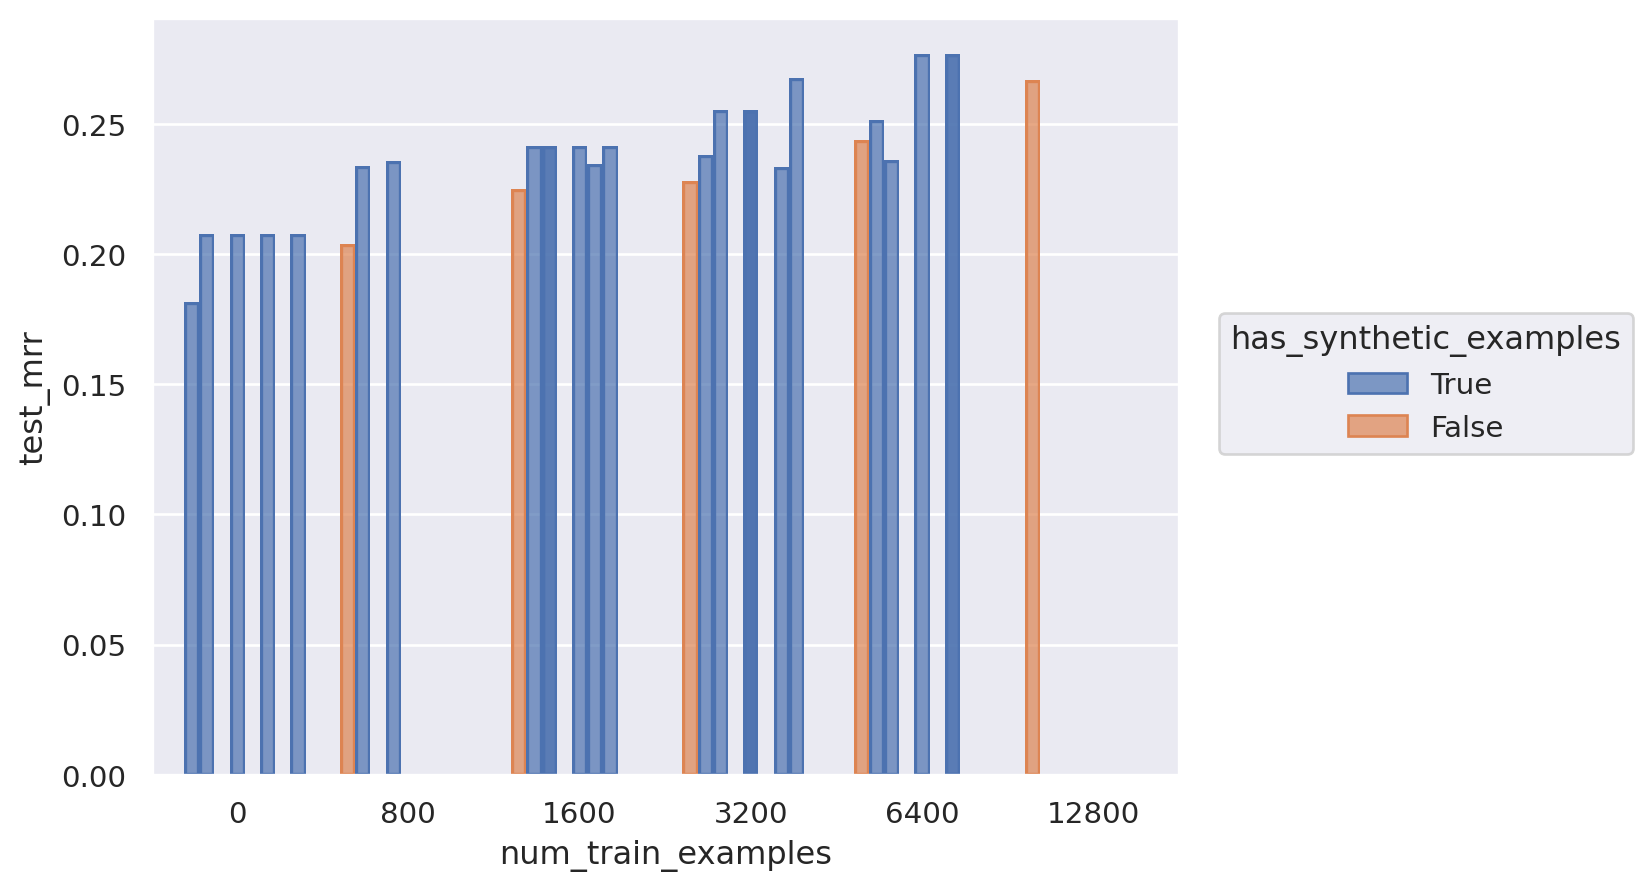

In [10]:
df = d2c_df_0_small
(
    so.Plot(df, x="num_train_examples", y="test_mrr", group="num_synthetic_examples", color="has_synthetic_examples")
    .scale(x=so.Nominal())
    .add(so.Bar(), so.Dodge(by=["num_train_examples"]))
)

In [11]:
history = get_run_history("ui89u0jk")
history

NameError: name 'get_run_history' is not defined

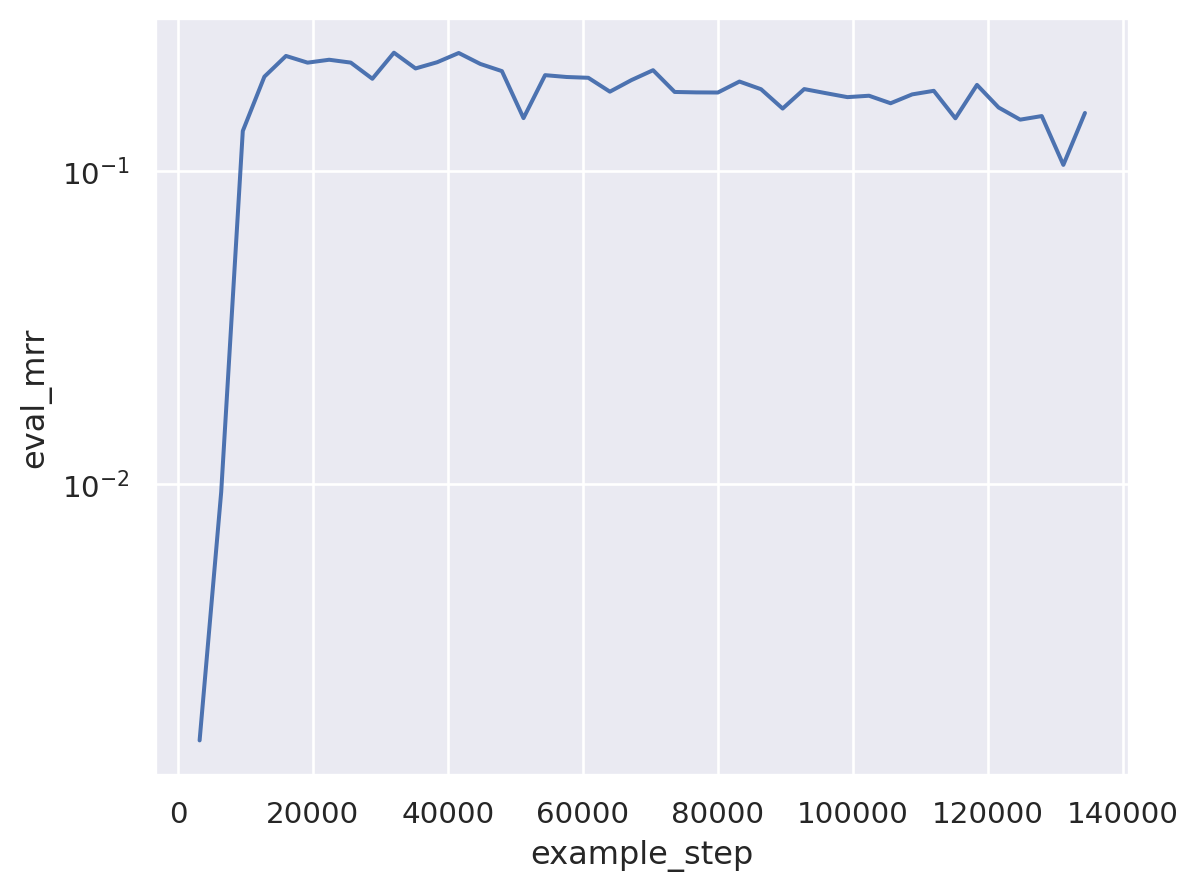

In [13]:
# Plot log loss and eval loss against example_step with seaborn
history
(so.Plot(history, x='example_step', y='eval_mrr')
 .scale(y='log')
 .add(so.Line())
#  .add(so.Line(y='eval_loss', label='eval loss'))
)

In [75]:
c2d_df = data.filtered_df(small=True, synthetic_datasets=(np.nan, "c2d_semisynthetic"), strategies=(np.nan,))

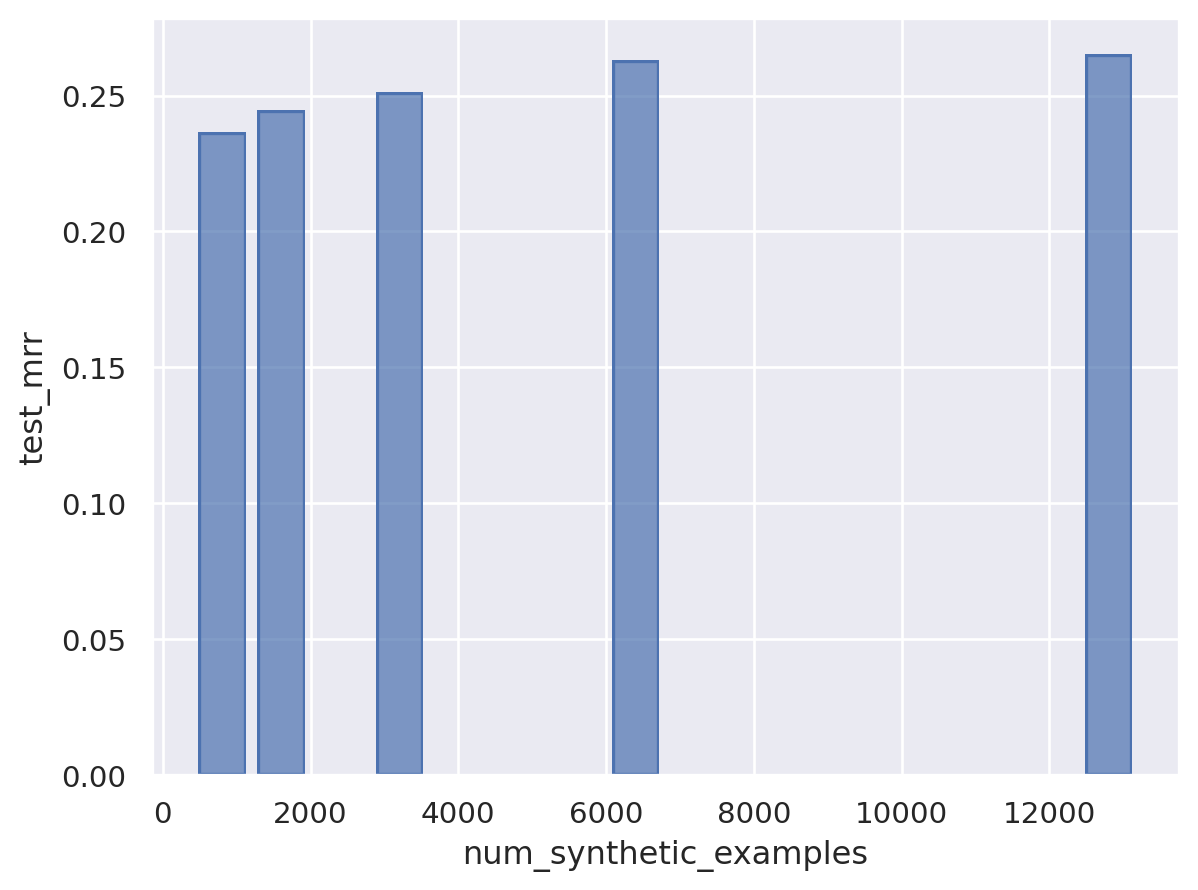

In [76]:
(so.Plot(c2d_df, x="num_synthetic_examples", y="test_mrr").add(so.Bar(), so.Agg()))

In [77]:

c2d_histories_df = get_all_histories(c2d_df)
# Plot log loss and eval loss against example_step with seaborn
(so.Plot(c2d_histories_df, x='example_step', y='eval_mrr', color='num_synthetic_examples')
#  .scale(y='log')
 .add(so.Line())
#  .add(so.Line(y='eval_loss', label='eval loss'))
)

AttributeError: type object 'RunData' has no attribute 'run_history'